# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

# Human Temperature Inferential Statistics Exercise

#### Import Necessary Packages and the CSV File

In [217]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
temp_dist = df['temperature'].sort_values()

import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import alpha
import math
%matplotlib inline
from scipy.stats import normaltest


#### Get Initial Information of Temperature Data with Head and Describe

In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [354]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### Test for Normal. Histogram Included.

### 1. The data set is likely to be a normal distribution.

### 2. There are 130 samples, which is greater than 30. The data set is large enough to analyze. The samples are independent.

2.70380143332 0.258747986349
It is likely that the distribution is normal


NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

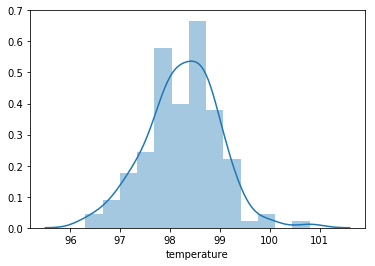

In [226]:
# Let's check data to see if it is a normal distribution

from scipy.stats import normaltest
value, p = normaltest(temp_dist)
print(value, p)
if p >= 0.05:
    print('It is likely that the distribution is normal')
else:
    print('It is unlikely that distribution is normal')  
    
sns.distplot(temp_dist)

# 1. The distribution of body temperature is normal.

# This is another way to use the normaltest funtion in scipy.
scipy.stats.mstats.normaltest(df['temperature'], axis=None)
 

In [225]:
# Calculate the sample mean and standard deviation.
mean = np.mean(df['temperature'])  #Get mean of temperature. 
print('The mean of the data set is equal to ',mean)

deviation = np.std(df['temperature']) #Get Test Std Deviation
print('The std deviation of the data set is equal to ',deviation)

The mean of the data set is equal to  98.24923076923078
The std deviation of the data set is equal to  0.7303577789050377


In [228]:
# Get population mean and std deviation (use sample deviation) for comparison.

pop_mean = 98.6 # Using the 98.6 mean temperature provided above as the population mean
pop_std = math.sqrt((deviation**2)/len(temp_dist)) # Calculate the population std deviation
print('The population mean is ',pop_mean)
print('The population std deviation is ',pop_std)


The population mean is  98.6
The population std deviation is  0.06405661469519336


In [238]:
# Population confidence interval for 95%. (+/- 47.5 from mean of 98.6)
# Use Z Score Table and find the value 1.96 (Margin of Error is 95%)
z_score = 1.96
interval = (pop_mean - z_score*pop_std, pop_mean+ z_score*pop_std)
print('The confidence interval for the population mean 98.6 is ',interval)


The confidence interval for the population mean 98.6 is  (98.47444903519741, 98.72555096480258)


In [244]:
# Let's find the confidence interval for 99% Margin of Error.
z_score = 2.58
interval = (pop_mean - z_score*pop_std, pop_mean + z_score*pop_std)
print('The confidence interval for 99% MOE is ', interval)

# 4. For a 95% confidence interval, a temperature less than 98.474 or greater than 98.726 is considered abnormal.


The confidence interval for 99% MOE is  (98.4347339340864, 98.7652660659136)


In [239]:
# Let's check the T Score information for the population.
t_score = 1.98
interval_t = (pop_mean - t_score*pop_std, pop_mean + t_score*pop_std)
print('The confidence inverval for the population using the t_score is ',interval_t)

The confidence inverval for the population using the t_score is  (98.47316790290351, 98.72683209709648)


### Using the T Score of 1.98, the minimum population is 98.4732 is still greater than our test number of 98.2492. The test mean does not equal 98.6. The t-test and z-test have almost equal confidence intervals as expected.

### 3. The sample mean is not equal to 98.6. It is 98.2392. Since we are comparing one sample to a population, we use a one-sample test. Ideally, use the t-test when the sample size is less than 30, and the population standard deviation is not known. Use the z-test when the sample size is larger than 30, and the standard deviation is unknown. In this case confidence intervals are extremely close since we have 130 samples; they will continue to get closer as the sample size increases.

### 4. For a 95% confidence interval, a temperature less than 98.474 or greater than 98.726 is considered abnormal.

In [60]:
np.var(df['temperature']) # Find variance with np.var.

0.5334224852071

In [355]:
# Let's check the test data confidence interval to get the "normal" range.
z_score = 1.96
print('The mean and z_score equal ',mean, z_score)
test_confidence = (mean - (z_score*pop_std), mean + (z_score*pop_std))
print('The confidence interval equals ',test_confidence)



The mean and z_score equal  98.24923076923078 1.96
The confidence interval equals  (98.12367980442819, 98.37478173403336)


#### Calculations of various tests were added out of curiosity.

In [252]:
# Check various tests to see the results.
print('t-statistic 1 sample = %6.3f pvalue = %6.4f' % stats.ttest_1samp(df['temperature'],pop_mean))
print('KS-statistic = %6.3f pvalue = %6.4f' % stats.kstest(df['temperature'], 'norm'))
print('ks-2 sample stat = %6.3f pvalue = %6.4f' % stats.ks_2samp(male_temp, female_temp))
print()
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(df['temperature'])) 
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(df['temperature']))
print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(df['temperature']))


t-statistic 1 sample = -5.455 pvalue = 0.0000
KS-statistic =  1.000 pvalue = 0.0000
ks-2 sample stat =  0.185 pvalue = 0.1954

normaltest teststat =  2.704 pvalue = 0.2587
normal skewtest teststat = -0.021 pvalue = 0.9830
normal kurtosistest teststat =  1.644 pvalue = 0.1001


### Compare Female and Male Temperature Data

In [363]:
# Identify mean and deviation of males and females to compare.
male_temp = df[df.gender == 'M'].temperature
female_temp = df[df.gender == 'F'].temperature
male_mean = np.mean(male_temp)
male_std = np.std(male_temp)
male_kurt = stats.kurtosistest(male_temp)
male_t = scipy.stats.ttest_1samp(male_temp,male_mean)
male_count = len(male_temp)
male_z = (male_mean - pop_mean)/pop_std
male_p = stats.norm.cdf(male_z)


print('The male mean temperature and std deviation equal ',male_mean, male_std)
print('The kurtosis test equals ',male_kurt)
print('The male t-test is ',male_t)
print('The number of male samples is ',male_count)
print('The male p_value is ',male_p)

print()

female_mean = np.mean(female_temp)
female_std = np.std(female_temp)
female_kurt = stats.kurtosistest(female_temp)
female_t = scipy.stats.ttest_1samp(female_temp, female_mean)
female_count = len(female_temp)
female_z = ((female_mean - pop_mean)/pop_std)
female_p = stats.norm.cdf(female_z)

print('The female mean temperature and std deviation equal ',female_mean, female_std)
print('The kurtosis test for females is ',female_kurt)
print('The female t-test is ',female_t)
print('The number of female samples is ',female_count)
print('The female pvalue is ',female_p)

print()
mean_diff = abs(male_mean - female_mean)
print('The mean absolute difference between female and male means is',mean_diff)
ks_2s = stats.ks_2samp(male_temp, female_temp)
print('The 2 sample kurtosis test is ',ks_2s)

# load results files

from pandas import read_csv
from matplotlib import pyplot
# load results file
results = DataFrame()
results['Female'] = df[df.gender == 'F'].temperature
results['Male'] = df[df.gender == 'M'].temperature

# descriptive stats
print()
print('Female Temperature Data Describe')
print(female_temp.describe())
print()
print('Male Temperature Data Describe')
print(male_temp.describe())
print()

from scipy.stats import normaltest

value, p = normaltest(female_temp)
print('Female Data = ',value, p)
if p >= 0.05:
    print('It is likely that result is normal')
else:
    print('It is unlikely that result is normal')  
 
print()

value2, p2 = normaltest(male_temp)
print('Male Data = ',value2, p2)
if p2 >= 0.05:
    print('It is likely that result is normal')
else:
    print('It is unlikely that result is normal')
 
print()

# calculate the significance

value, pvalue = ttest_ind(female_temp, male_temp, equal_var=True)
print('The t-test data comparing the two sets = ',value, pvalue)
if pvalue >= 0.05:
    print('Samples are likely drawn from the same distributions (accept H0) statistically insignificant')
else:
    print('Samples are likely drawn from different distributions (reject H0) statistically significant')
    
# 5. There is a statistically significant variance between the female and male temperatures.
# 5. A t-test two-sample test was used since we compared two samples.
    


The male mean temperature and std deviation equal  98.1046153846154 0.6933598841828696
The kurtosis test equals  KurtosistestResult(statistic=-0.58126846340432392, pvalue=0.56105953177336954)
The male t-test is  Ttest_1sampResult(statistic=-3.279302431971439e-13, pvalue=0.99999999999973932)
The number of male samples is  65
The male p_value is  5.229680932e-15

The female mean temperature and std deviation equal  98.39384615384613 0.7377464486428966
The kurtosis test for females is  KurtosistestResult(statistic=2.1486794123176178, pvalue=0.031659821780462477)
The female t-test is  Ttest_1sampResult(statistic=1.5410014908339561e-13, pvalue=0.99999999999987754)
The number of female samples is  65
The female pvalue is  0.000644748780994

The mean absolute difference between female and male means is 0.289230769230727
The 2 sample kurtosis test is  Ks_2sampResult(statistic=0.18461538461538457, pvalue=0.19539014047941772)

Female Temperature Data Describe
count     65.000000
mean      98.393

### 5. There is a statistically significant variance between the female and male temperatures. A t-test two-sample test was used to compare the two samples.

####  The mean absolute difference between the female and male data = 0.2892
####  Both data sets were tested and found to be normal.
####  Female Mean = 98.3939 and Male Mean = 98.1046
####  Female Std Dev = 0.7435 and Male Std Dev = 0.6988
####  Both sets of data contained 65 samples.

###  Summary Story of Exercise

### Using the sample data, it is likely that the sample mean 98.2392 compared to the 98.6 population mean is statistically significant. The data set is likely to be a normal distribution. There were 130 independent samples (65 were female, and 65 were male). Several tests were done: z-test, t-test (one and two sample), normal test, variance, margin of error and confidence intervals. The summary of the responses to the five questions is below. 


#### 1. The data set is likely to be a normal distribution.

#### 2. There are 130 samples, which is greater than 30. The data set is large enough to analyze. The samples are independent.

#### 3. The sample mean is not equal to 98.6. It is 98.2392. Since we are comparing one sample to a population, we use a one-sample test. Ideally, use the t-test when the sample size is less than 30, and the population standard deviation is not known. Use the z-test when the sample size is larger than 30, and the standard deviation is unknown. In this case confidence intervals are extremely close since we have 130 samples; they will continue to get closer as the sample size increases.

#### 4. For a 95% confidence interval, a temperature less than 98.474 or greater than 98.726 is considered abnormal.

#### 5. There is a statistically significant variance between the female and male temperatures. A t-test two-sample test was used to compare the two samples.